# EMBA 1520 Project

This project is written in Python.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries to access the data.medicare.gov API
!pip install sodapy #package to access general API
from sodapy import Socrata #Socrata is the API

# Libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

## Nursing Homes

Import the data. 

Loading directly from data.medicare.gov in order always have the most up-to-date data set.

From Medicare:
    Nursing Home Compare has detailed information about every Medicare - Opens in a new window and Medicaid - Opens in a new window-certified nursing home in the country. A nursing home is a place for people who can’t be cared for at home and need 24-hour nursing care.

Provider Subset:
General information on currently active nursing homes, including number of certified beds, quality measure scores, staffing and other information used in the Five-Star Rating System. Data are presented as one row per nursing home.


In [2]:
# this code comes from: https://dev.socrata.com/foundry/data.medicare.gov/4pq5-n9py


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.medicare.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.medicare.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 20,000 results, returned as JSON from API / converted to Python list of (nb: This data set has ~15.5k records)
# dictionaries by sodapy.
results = client.get("4pq5-n9py",limit=20000) # 4pq5-n9py is the serial for the nursing home providers data set

# Convert to pandas DataFrame
NH_Providers = pd.DataFrame.from_records(results)

In [3]:
NH_Providers.head(n=5) # looking at the data


federal_provider_number               provider_name  \
0                  015124    CLAY COUNTY NURSING HOME   
1                  015407             HEALTH CARE INC   
2                  045288      ALLAY HEALTH AND REHAB   
3                  045322  PIONEER THERAPY AND LIVING   
4                  045401      WHITE RIVER HEALTHCARE   

                 provider_address provider_city provider_state  \
0  83825 HIGHWAY 9   P O BOX 1270       ASHLAND             AL   
1                     P O BOX 130      ASHVILLE             AL   
2                3115 BOWMAN ROAD   LITTLE ROCK             AR   
3           1506 EAST MAIN STREET     MELBOURNE             AR   
4              1569 AR HIGHWAY 56   CALICO ROCK             AR   

  provider_zip_code provider_phone_number provider_ssa_county  \
0             36251            2563542131                 130   
1             35953            2055945148                 570   
2             72211            5012284848                 590   
3             72556            8703684377                 320   
4             72519            8702973719                 320   

  provider_county_name                          ownership_type  ...  \
0                 Clay                      Non profit - Other  ...   
1            St. Clair                 For profit - Individual  ...   
2              Pulaski  For profit - Limited Liability company  ...   
3                Izard                For profit - Corporation  ...   
4                Izard                For profit - Corporation  ...   

  reported_staffing_footnote physical_therapist_staffing_footnote location  \
0                        NaN                                  NaN      NaN   
1                        NaN                                  NaN      NaN   
2                          6                                    6      NaN   
3                        NaN                                  NaN      NaN   
4                          6                                    6      NaN   

   :@computed_region_f3tr_pr43 :@computed_region_nwen_78xc  \
0                          NaN                         NaN   
1                          NaN                         NaN   
2                          NaN                         NaN   
3                          NaN                         NaN   
4                          NaN                         NaN   

  :@computed_region_csmy_5jwy  overall_rating_footnote  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                         NaN                      NaN   

   health_inspection_rating_footnote  qm_rating_footnote  special_focus_status  
0                                NaN                 NaN                   NaN  
1                                NaN                 NaN                   NaN  
2                                NaN                 NaN                   NaN  
3                                NaN                 NaN                   NaN  
4                                NaN                 NaN                   NaN  

[5 rows x 89 columns]

In [4]:
NH_Providers.info() # looking the columns (number, name, data type, etc)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15450 entries, 0 to 15449
Data columns (total 89 columns):
federal_provider_number                                            15450 non-null object
provider_name                                                      15450 non-null object
provider_address                                                   15450 non-null object
provider_city                                                      15450 non-null object
provider_state                                                     15450 non-null object
provider_zip_code                                                  15450 non-null object
provider_phone_number                                              15450 non-null object
provider_ssa_county                                                15450 non-null object
provider_county_name                                               15450 non-null object
ownership_type                                                     15450 non-null object
n

The distribution of nursing homes around the country by state.

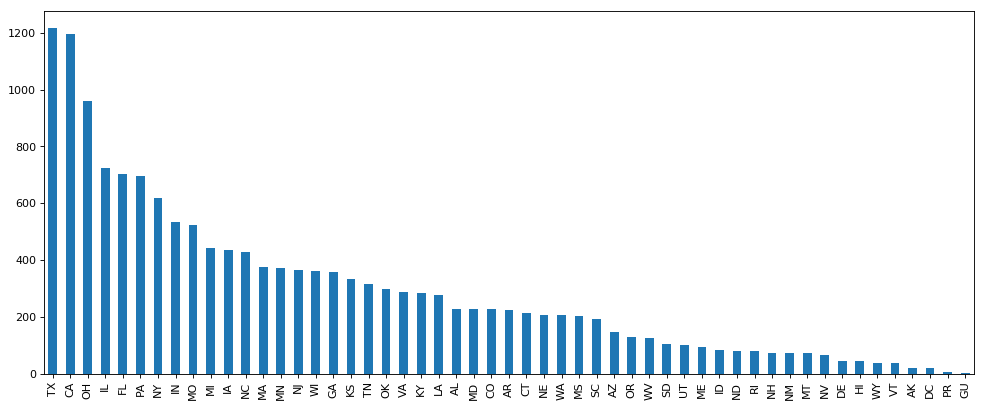

In [5]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k') # make the graph bigger

NH_Providers.provider_state.value_counts().plot(kind='bar') 

Extracting the only the columns we'll need for the merge.

Need to add the facility type to distinguish the facilities upon merge.

In [6]:
NH_Providers['type'] = "nursing_home"
NH_Providers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15450 entries, 0 to 15449
Data columns (total 90 columns):
federal_provider_number                                            15450 non-null object
provider_name                                                      15450 non-null object
provider_address                                                   15450 non-null object
provider_city                                                      15450 non-null object
provider_state                                                     15450 non-null object
provider_zip_code                                                  15450 non-null object
provider_phone_number                                              15450 non-null object
provider_ssa_county                                                15450 non-null object
provider_county_name                                               15450 non-null object
ownership_type                                                     15450 non-null object
n

In [7]:
NH_Providers_contact = NH_Providers[['provider_name','provider_address','provider_city','provider_state','provider_zip_code','provider_county_name',
                                             'provider_phone_number','type']]




Set the county name to uppercase

In [8]:
NH_Providers_contact['provider_county_name'] = NH_Providers_contact['provider_county_name'].str.upper() 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Format phone numbers; remove paranthesis, spaces, and dashes


In [9]:
NH_Providers_contact['provider_phone_number'] = NH_Providers_contact['provider_phone_number'].str.replace("(","")
NH_Providers_contact['provider_phone_number'] = NH_Providers_contact['provider_phone_number'].str.replace(")","")
NH_Providers_contact['provider_phone_number'] = NH_Providers_contact['provider_phone_number'].str.replace("-","")
NH_Providers_contact['provider_phone_number'] = NH_Providers_contact['provider_phone_number'].str.replace(" ","")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [10]:
NH_Providers_contact.head(n=5)

provider_name                provider_address provider_city  \
0    CLAY COUNTY NURSING HOME  83825 HIGHWAY 9   P O BOX 1270       ASHLAND   
1             HEALTH CARE INC                     P O BOX 130      ASHVILLE   
2      ALLAY HEALTH AND REHAB                3115 BOWMAN ROAD   LITTLE ROCK   
3  PIONEER THERAPY AND LIVING           1506 EAST MAIN STREET     MELBOURNE   
4      WHITE RIVER HEALTHCARE              1569 AR HIGHWAY 56   CALICO ROCK   

  provider_state provider_zip_code provider_county_name provider_phone_number  \
0             AL             36251                 CLAY            2563542131   
1             AL             35953            ST. CLAIR            2055945148   
2             AR             72211              PULASKI            5012284848   
3             AR             72556                IZARD            8703684377   
4             AR             72519                IZARD            8702973719   

           type  
0  nursing_home  
1  nursing_home  
2  nursing_home  
3  nursing_home  
4  nursing_home

Checking for null values in the data set.

In [11]:
NH_Providers_contact.isna().sum()

provider_name            0
provider_address         0
provider_city            0
provider_state           0
provider_zip_code        0
provider_county_name     0
provider_phone_number    0
type                     0
dtype: int64

Delete the larger dataframe to clear memory.

In [12]:
del NH_Providers

## Dialysis Centers

Import the data.

Loading directly from data.medicare.gov in order always have the most up-to-date data set.

From Medicare: Dialysis Facility Compare datasets: These are the official datasets used on the Medicare.gov Dialysis Facility Compare Website provided by the Centers for Medicare & Medicaid Services.  These data allow you to compare the quality of care provided in Medicare-certified dialysis facilities nationwide.

Facility Subset: A list of all dialysis facilities registered with Medicare that includes addresses and phone numbers, as well as services and quality of care provided.

In [13]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.medicare.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.medicare.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 10,000 results, returned as JSON from API / converted to Python list of (nb: This data set has ~7.5k records)
# dictionaries by sodapy.
results = client.get("23ew-n7w9",limit=10000)

# Convert to pandas DataFrame
D_Facilities = pd.DataFrame.from_records(results)

In [14]:
D_Facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578 entries, 0 to 7577
Columns: 118 entries, provider_number to address_line_2
dtypes: bool(5), object(113)
memory usage: 6.6+ MB


In [15]:
list(D_Facilities.columns)

['provider_number',
 'network',
 'facility_name',
 'five_star_date',
 'five_star',
 'five_star_data_availability_code',
 'address_line_1',
 'city',
 'state',
 'zip',
 'county',
 'phone_number',
 'profit_or_non_profit_',
 'chain_owned',
 'chain_organization',
 'late_shift_',
 '_of_dialysis_stations',
 'offers_in_center_hemodialysis',
 'offers_in_center_peritoneal_dialysis',
 'offers_home_hemodialysis_training',
 'certification_date',
 'claims_date',
 'crownweb_date',
 'strr_date',
 'percentage_of_medicare_patients_with_hgb_10_g_dl',
 'hgb_10_data_availability_code',
 'percentage_of_medicare_patients_with_hgb_12_g_dl',
 'hgb_12_data_availability_code',
 'number_of_dialysis_patients_with_hgb_data',
 'patient_transfusion_data_availability_code',
 'patient_transfusion_category_text',
 'lists_the_number_of_patients_included_in_the_facility_s_transfusion_summary_facility',
 'percent_of_adult_hd_patients_with_kt_v_1_2',
 'adult_hd_kt_v_data_availability_code',
 'percentage_of_adult_pd_pts_with

In [16]:
pd.set_option('display.max_rows', None) # There are 118 columns so this allows all of the to be displayed

D_Facilities.isna().sum() # Looking for NaN values

provider_number                                                                                       0
network                                                                                               0
facility_name                                                                                         0
five_star_date                                                                                        0
five_star                                                                                             0
five_star_data_availability_code                                                                      0
address_line_1                                                                                        0
city                                                                                                  0
state                                                                                                 0
zip                                                             

Distribution of dialysis centers across the country by state.

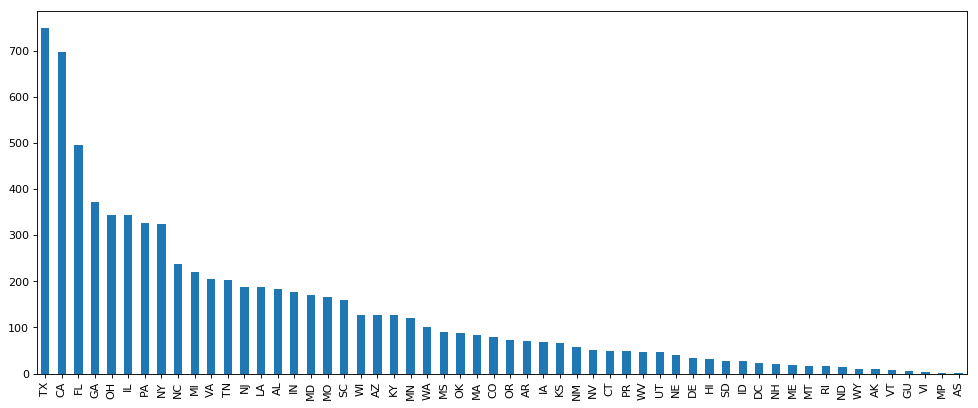

In [17]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k') #make the plot bigger

D_Facilities.state.value_counts().plot(kind='bar')

Adding the type of center

In [18]:
D_Facilities['type'] = "dialysis_center"
D_Facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578 entries, 0 to 7577
Columns: 119 entries, provider_number to type
dtypes: bool(5), object(114)
memory usage: 6.6+ MB


Extracting the columns needed for the merge.

In [19]:
D_Facilities_contact = D_Facilities[['facility_name','address_line_1','city','state','zip','county','phone_number','type']]

Make sure county names are uppercase

In [20]:
D_Facilities_contact['county'] = D_Facilities_contact['county'].str.upper() 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
D_Facilities_contact['phone_number'] = D_Facilities_contact['phone_number'].str.replace("(","")
D_Facilities_contact['phone_number'] = D_Facilities_contact['phone_number'].str.replace(")","")
D_Facilities_contact['phone_number'] = D_Facilities_contact['phone_number'].str.replace("-","")
D_Facilities_contact['phone_number'] = D_Facilities_contact['phone_number'].str.replace(" ","")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [22]:
D_Facilities_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578 entries, 0 to 7577
Data columns (total 8 columns):
facility_name     7578 non-null object
address_line_1    7578 non-null object
city              7578 non-null object
state             7578 non-null object
zip               7578 non-null object
county            7578 non-null object
phone_number      7578 non-null object
type              7578 non-null object
dtypes: object(8)
memory usage: 473.8+ KB


In [23]:
D_Facilities_contact.head(n=20)

facility_name                address_line_1         city  \
0      CHILDRENS HOSPITAL DIALYSIS         1600 7TH AVENUE SOUTH   BIRMINGHAM   
1                 FMC CAPITOL CITY          255 S JACKSON STREET   MONTGOMERY   
2                 GADSDEN DIALYSIS        409 SOUTH FIRST STREET      GADSDEN   
3   TUSCALOOSA UNIVERSITY DIALYSIS               220 15TH STREET   TUSCALOOSA   
4                   PCD MONTGOMERY            1001 FOREST AVENUE   MONTGOMERY   
5                  DOTHAN DIALYSIS             216 GRACELAND DR.       DOTHAN   
6                       FMC MOBILE             2620 OLD SHELL RD       MOBILE   
7         BIRMINGHAM EAST DIALYSIS          1105 EAST PARK DRIVE   BIRMINGHAM   
8                FMC NORTH ALABAMA     1311 N MEMORIAL PKWY #200   HUNTSVILLE   
9                        FMC SELMA    905 MEDICAL CENTER PARKWAY        SELMA   
10                    FMC LANGDALE                8 MEDICAL PARK       VALLEY   
11                     FMC OPELIKA  2609 VILLAGE PROFESSIONAL DR      OPELIKA   
12              DSI SOUTH DIALYSIS            3201 3RD AVE SOUTH   BIRMINGHAM   
13   DVA HEALTHCARE RENAL CARE INC  15953 ATHENS LIMESTONE DRIVE       ATHENS   
14                  FMC SCOTTSBORO        20998 JOHN T. REID HWY   SCOTTSBORO   
15      FRESENIUS KIDNEY CARE TROY                 606 BOTTS AVE         TROY   
16                      DCI DOTHAN             1630 COLUMBIA HWY       DOTHAN   
17                  FMC HUNTSVILLE             2325 PANSY STREET   HUNTSVILLE   
18            PHENIX CITY DIALYSIS         4391 RIVERCHASE DRIVE  PHENIX CITY   
19                 FMC EAST MOBILE            1217 GOVERNMENT ST       MOBILE   

   state    zip      county phone_number             type  
0     AL  35233   JEFFERSON   2056389275  dialysis_center  
1     AL  36104  MONTGOMERY   3342631028  dialysis_center  
2     AL  35901      ETOWAH   2565472457  dialysis_center  
3     AL  35401  TUSCALOOSA   2053456004  dialysis_center  
4     AL  36106  MONTGOMERY   3342699416  dialysis_center  
5     AL  36305     HOUSTON   3347934077  dialysis_center  
6     AL  36607      MOBILE   2514762762  dialysis_center  
7     AL  35235   JEFFERSON   2058336003  dialysis_center  
8     AL  35801     MADISON   2565368571  dialysis_center  
9     AL  36701      DALLAS   3348749021  dialysis_center  
10    AL  36854    CHAMBERS   3347564192  dialysis_center  
11    AL  36801         LEE   3347495085  dialysis_center  
12    AL  35222   JEFFERSON   2055025300  dialysis_center  
13    AL  35613   LIMESTONE   2562334730  dialysis_center  
14    AL  35768     JACKSON   2562594777  dialysis_center  
15    AL  36081        PIKE   3345667266  dialysis_center  
16    AL  36303     HOUSTON   3347933519  dialysis_center  
17    AL  35801     MADISON   2565361897  dialysis_center  
18    AL  36867     RUSSELL   3342980294  dialysis_center  
19    AL  36604      MOBILE   2514386917  dialysis_center

In [24]:
D_Facilities_contact.isna().sum()

facility_name     0
address_line_1    0
city              0
state             0
zip               0
county            0
phone_number      0
type              0
dtype: int64

In [25]:
pd.set_option('display.max_rows', 50)
D_Facilities_contact[D_Facilities_contact.isna().any(axis=1)]

Empty DataFrame
Columns: [facility_name, address_line_1, city, state, zip, county, phone_number, type]
Index: []

Memory management

In [26]:
del D_Facilities

## Long Term Care

Import the data.

Loading directly from data.medicare.gov in order always have the most up-to-date data set.

Long-Term Care Hospital Compare datasets: These are the official datasets used on the Medicare.gov Long-Term Care Hospital Compare Website provided by the Centers for Medicare & Medicaid Services.  These data allow you to compare the quality of care provided by over 420 Medicare-certified long-term care hospitals across the nation.

General Information Subset: A list of long-term care hospitals with information such as address, phone number, ownership data and more.

In [27]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.medicare.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.medicare.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 1000 results, returned as JSON from API / converted to Python list of (nb: This data set has ~.37k records)
# dictionaries by sodapy.
results = client.get("azum-44iv",limit=1000)

# Convert to pandas DataFrame
LTC_Facilities = pd.DataFrame.from_records(results)

In [28]:
LTC_Facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 16 columns):
cms_certification_number_ccn    377 non-null object
facility_name                   377 non-null object
address_line_1                  377 non-null object
city                            377 non-null object
state                           377 non-null object
zip_code                        377 non-null object
county_name                     377 non-null object
phonenumber                     377 non-null object
cms_region                      377 non-null object
ownership_type                  377 non-null object
certification_date              377 non-null object
total_number_of_beds            377 non-null object
location                        342 non-null object
:@computed_region_f3tr_pr43     342 non-null object
:@computed_region_nwen_78xc     342 non-null object
:@computed_region_csmy_5jwy     340 non-null object
dtypes: object(16)
memory usage: 47.2+ KB


In [29]:
LTC_Facilities.isna().sum()

cms_certification_number_ccn     0
facility_name                    0
address_line_1                   0
city                             0
state                            0
zip_code                         0
county_name                      0
phonenumber                      0
cms_region                       0
ownership_type                   0
certification_date               0
total_number_of_beds             0
location                        35
:@computed_region_f3tr_pr43     35
:@computed_region_nwen_78xc     35
:@computed_region_csmy_5jwy     37
dtype: int64

Distribution of LTC facilities across the country by state.

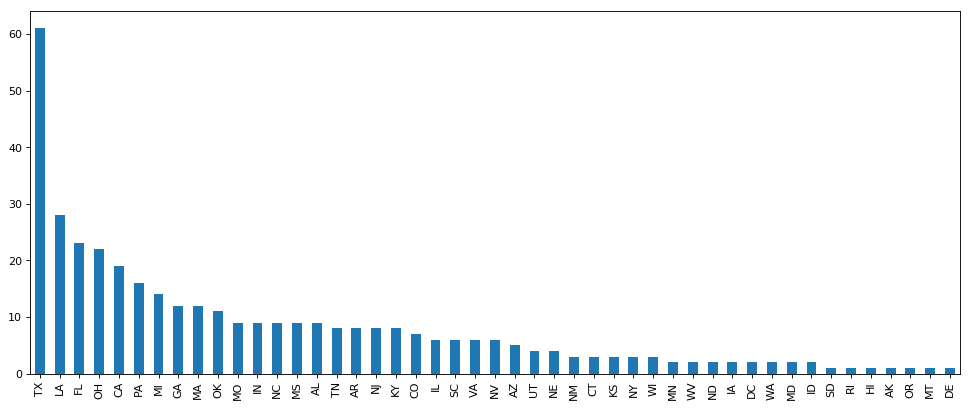

In [30]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k') #make the plot bigger

LTC_Facilities.state.value_counts().plot(kind='bar')

Adding facility type

In [31]:
LTC_Facilities['type'] = "ltc_facility"
LTC_Facilities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 17 columns):
cms_certification_number_ccn    377 non-null object
facility_name                   377 non-null object
address_line_1                  377 non-null object
city                            377 non-null object
state                           377 non-null object
zip_code                        377 non-null object
county_name                     377 non-null object
phonenumber                     377 non-null object
cms_region                      377 non-null object
ownership_type                  377 non-null object
certification_date              377 non-null object
total_number_of_beds            377 non-null object
location                        342 non-null object
:@computed_region_f3tr_pr43     342 non-null object
:@computed_region_nwen_78xc     342 non-null object
:@computed_region_csmy_5jwy     340 non-null object
type                            377 non-null object
dtypes: obj

Extracting columns needed for merge

In [32]:
LTC_Facilities_contact = LTC_Facilities[['facility_name','address_line_1','city','state','zip_code','county_name','phonenumber','type']]

In [33]:
LTC_Facilities_contact['county_name'] = LTC_Facilities_contact['county_name'].str.upper() 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
LTC_Facilities_contact['phonenumber'] = LTC_Facilities_contact['phonenumber'].str.replace("(","")
LTC_Facilities_contact['phonenumber'] = LTC_Facilities_contact['phonenumber'].str.replace(")","")
LTC_Facilities_contact['phonenumber'] = LTC_Facilities_contact['phonenumber'].str.replace("-","")
LTC_Facilities_contact['phonenumber'] = LTC_Facilities_contact['phonenumber'].str.replace(" ","")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Memory management

In [35]:
del LTC_Facilities

## Hospitals

In [36]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.medicare.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.medicare.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 1000 results, returned as JSON from API / converted to Python list of (nb: This data set has ~5.7k records)
# dictionaries by sodapy.
results = client.get("xubh-q36u",limit=10000)

# Convert to pandas DataFrame
Hospitals = pd.DataFrame.from_records(results)

In [37]:
Hospitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 32 columns):
provider_id                                                      5339 non-null object
hospital_name                                                    5339 non-null object
address                                                          5339 non-null object
city                                                             5339 non-null object
state                                                            5339 non-null object
zip_code                                                         5339 non-null object
county_name                                                      5339 non-null object
phone_number                                                     5339 non-null object
hospital_type                                                    5339 non-null object
hospital_ownership                                               5339 non-null object
emergency_services               

In [38]:
Hospitals['type'] = "hospital"

In [39]:
Hospitals_contact = Hospitals[['hospital_name','address','city','state','zip_code','county_name','phone_number','type']]

In [40]:
Hospitals_contact['phone_number'] = Hospitals_contact['phone_number'].str.replace("(","")
Hospitals_contact['phone_number'] = Hospitals_contact['phone_number'].str.replace(")","")
Hospitals_contact['phone_number'] = Hospitals_contact['phone_number'].str.replace("-","")
Hospitals_contact['phone_number'] = Hospitals_contact['phone_number'].str.replace(" ","")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [41]:
Hospitals_contact.head(n=5)

hospital_name                    address          city  \
0             SAGE MEMORIAL HOSPITAL  STATE ROUTE 264 SOUTH 191        GANADO   
1        WOODRIDGE BEHAVIORAL CENTER       600 NORTH 7TH STREET  WEST MEMPHIS   
2           DOUGLAS GARDENS HOSPITAL            5200 NE 2ND AVE         MIAMI   
3  SUNCOAST BEHAVIORAL HEALTH CENTER             4480 51ST ST W     BRADENTON   
4           TREASURE VALLEY HOSPITAL   8800 WEST EMERALD STREET         BOISE   

  state zip_code county_name phone_number      type  
0    AZ    86505      APACHE   9287554541  hospital  
1    AR    72301  CRITTENDEN   8703944113  hospital  
2    FL    33137  MIAMI-DADE   3057518626  hospital  
3    FL    34210     MANATEE   9417922222  hospital  
4    ID    83704         ADA   2083735000  hospital

## Merge into one dataset

Renaming the columns with a consistent naming scheme.

In [42]:
NH_Providers_contact = NH_Providers_contact.rename(columns={'provider_address':'address','provider_city':'city','provider_state':'state','provider_zip_code':'zip','provider_county_name':'county',
                                             'provider_phone_number':'phone_number',})
NH_Providers_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15450 entries, 0 to 15449
Data columns (total 8 columns):
provider_name    15450 non-null object
address          15450 non-null object
city             15450 non-null object
state            15450 non-null object
zip              15450 non-null object
county           15450 non-null object
phone_number     15450 non-null object
type             15450 non-null object
dtypes: object(8)
memory usage: 965.8+ KB


In [43]:
D_Facilities_contact = D_Facilities_contact.rename(columns={'facility_name':'provider_name','address_line_1':'address'})           

D_Facilities_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578 entries, 0 to 7577
Data columns (total 8 columns):
provider_name    7578 non-null object
address          7578 non-null object
city             7578 non-null object
state            7578 non-null object
zip              7578 non-null object
county           7578 non-null object
phone_number     7578 non-null object
type             7578 non-null object
dtypes: object(8)
memory usage: 473.8+ KB


In [44]:
LTC_Facilities_contact = LTC_Facilities_contact.rename(columns={'facility_name':'provider_name','address_line_1':'address','zip_code':'zip','county_name':'county',
                                                        'phonenumber':'phone_number'})

LTC_Facilities_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
provider_name    377 non-null object
address          377 non-null object
city             377 non-null object
state            377 non-null object
zip              377 non-null object
county           377 non-null object
phone_number     377 non-null object
type             377 non-null object
dtypes: object(8)
memory usage: 23.7+ KB


In [45]:
Hospitals_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 8 columns):
hospital_name    5339 non-null object
address          5339 non-null object
city             5339 non-null object
state            5339 non-null object
zip_code         5339 non-null object
county_name      5339 non-null object
phone_number     5339 non-null object
type             5339 non-null object
dtypes: object(8)
memory usage: 333.8+ KB


In [46]:
Hospitals_contact = Hospitals_contact.rename(columns={'hospital_name':'provider_name','zip_code':'zip','county_name':'county',
                                                })

Hospitals_contact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 8 columns):
provider_name    5339 non-null object
address          5339 non-null object
city             5339 non-null object
state            5339 non-null object
zip              5339 non-null object
county           5339 non-null object
phone_number     5339 non-null object
type             5339 non-null object
dtypes: object(8)
memory usage: 333.8+ KB


Merging the data into one dataframe

In [47]:
Output=pd.concat([NH_Providers_contact, D_Facilities_contact, LTC_Facilities_contact, Hospitals_contact], axis=0, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True, sort=False)

Output = Output.sort_values(by=['state','county', 'city'])

In [48]:
Output.head(n=10)

provider_name  \
3897                   PROVIDENCE EXTENDED CARE   
5036        PROVIDENCE TRANSITIONAL CARE CENTER   
7348  PRESTIGE CARE & REHAB CENTER OF ANCHORAGE   
184                               FMC ANCHORAGE   
188               LIBERTY DIALYSIS - ALASKA LLC   
189                              FMC COOK INLET   
191                      DENALI DIALYSIS CENTER   
192                              TUDOR DIALYSIS   
131                 ST ELIAS SPECIALTY HOSPITAL   
77                     ALASKA REGIONAL HOSPITAL   

                                address       city state    zip     county  \
3897              920 COMPASSION CIRCLE  ANCHORAGE    AK  99504  ANCHORAGE   
5036              910 COMPASSION CIRCLE  ANCHORAGE    AK  99504  ANCHORAGE   
7348              9100 CENTENNIAL DRIVE  ANCHORAGE    AK  99504  ANCHORAGE   
184                  3950 LAUREL STREET  ANCHORAGE    AK  99508  ANCHORAGE   
188   901 EAST DIMOND BOULEVARD SUITE G  ANCHORAGE    AK  99515  ANCHORAGE   
189                  9085 BLACKBERRY ST  ANCHORAGE    AK  99502  ANCHORAGE   
191         360 BONIFACE PKWY SUITE A11  ANCHORAGE    AK  99504  ANCHORAGE   
192                     2735 E TUDOR RD  ANCHORAGE    AK  99507  ANCHORAGE   
131                 4800 CORDOVA STREET  ANCHORAGE    AK  99503  ANCHORAGE   
77                     2801 DEBARR ROAD  ANCHORAGE    AK  99508  ANCHORAGE   

     phone_number             type  
3897   9072129200     nursing_home  
5036   9072129100     nursing_home  
7348   9073338100     nursing_home  
184    9075633149  dialysis_center  
188    9075229009  dialysis_center  
189    9078681779  dialysis_center  
191    9073322400  dialysis_center  
192    9075621546  dialysis_center  
131    9075613333     ltc_facility  
77     9072761131         hospital

In [49]:
Output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28744 entries, 3897 to 840
Data columns (total 8 columns):
provider_name    28744 non-null object
address          28744 non-null object
city             28744 non-null object
state            28744 non-null object
zip              28744 non-null object
county           28744 non-null object
phone_number     28744 non-null object
type             28744 non-null object
dtypes: object(8)
memory usage: 2.0+ MB


Exporting dataframe as a CSV file

In [50]:
Output.to_csv('Medicare Consolidated Contact Info.csv', index = False, header=True)